In [44]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from astropy import table
from astropy.coordinates import SkyCoord
import astropy.units as u
import h5py
import os
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)

## Make a KDE plot of the separations for KN, AGN, TDE and SLSN (to represent one of the Sersic-based separations)

In [45]:
scotchdir = "/global/cscratch1/sd/kessler/SNANA_LSST_SIM/SCOTCH_Z3_V2/"
def get_sep(classname):
    full_info = []
    for file in os.listdir(scotchdir+classname):        
        if "HEAD" in file:
            head = table.Table.read(scotchdir+'/'+classname+'/'+file, format='fits').to_pandas()
            full_info.append(head)
    full = pd.concat(full_info)
    full = full[full['HOSTGAL_RA']!=-999] # remove the no-host events
    c2 = SkyCoord(full['HOSTGAL_RA'].values*u.deg, full['HOSTGAL_DEC'].values*u.deg, frame='icrs')
    c1 = SkyCoord(0.0*u.deg, 0.0*u.deg, frame='icrs')
    sep = c1.separation(c2)
    redshift = np.asarray(full['HOSTGAL_SPECZ'])
    sep_phys = cosmo.kpc_proper_per_arcmin(redshift)*sep.to(u.arcmin)
    return sep_phys

In [46]:
ls /global/cscratch1/sd/kessler/SNANA_LSST_SIM/SCOTCH_Z3_V2/

MLAG_SCOTCH_Z3_AGN01/             MLAG_SCOTCH_Z3_SNIIn-MOSFIT/
MLAG_SCOTCH_Z3_AGN20/             MLAG_SCOTCH_Z3_SNIa-91bg/
MLAG_SCOTCH_Z3_KN_B19/            MLAG_SCOTCH_Z3_SNIa-SALT2/
MLAG_SCOTCH_Z3_KN_K17/            MLAG_SCOTCH_Z3_SNIax/
MLAG_SCOTCH_Z3_SLSN-I/            MLAG_SCOTCH_Z3_SNIb+HostXT_V19/
MLAG_SCOTCH_Z3_SNII+HostXT_V19/   MLAG_SCOTCH_Z3_SNIb-Templates/
MLAG_SCOTCH_Z3_SNII-NMF/          MLAG_SCOTCH_Z3_SNIc+HostXT_V19/
MLAG_SCOTCH_Z3_SNII-Templates/    MLAG_SCOTCH_Z3_SNIc-Templates/
MLAG_SCOTCH_Z3_SNIIb+HostXT_V19/  MLAG_SCOTCH_Z3_SNIcBL+HostXT_V19/
MLAG_SCOTCH_Z3_SNIIn+HostXT_V19/  MLAG_SCOTCH_Z3_TDE/


In [47]:
sep_phys_slsn = get_sep("MLAG_SCOTCH_Z3_SLSN-I")
sep_phys_tde = get_sep("MLAG_SCOTCH_Z3_TDE")
sep_phys_agn = get_sep("MLAG_SCOTCH_Z3_AGN01")
sep_phys_kn = get_sep("MLAG_SCOTCH_Z3_KN_K17")

Text(0.5, 0, 'Separation [physical kpc]')

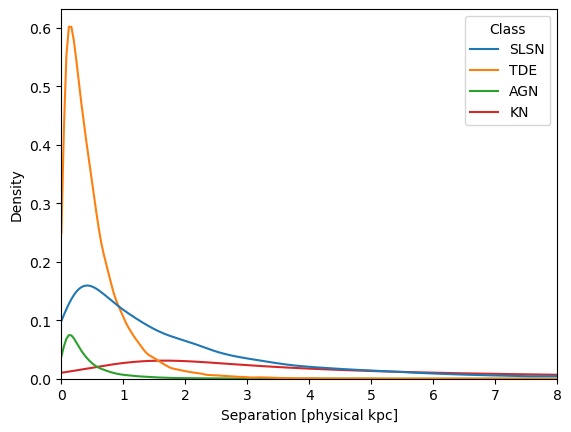

In [54]:
sep = np.concatenate((sep_phys_slsn,sep_phys_tde,sep_phys_agn,sep_phys_kn))
class_labels = ['SLSN']*len(sep_phys_slsn) + ['TDE']*len(sep_phys_tde) + ['AGN']*len(sep_phys_agn) + ['KN']*len(sep_phys_kn)
df = pd.DataFrame({
    'Separation': sep.value,
    'Class': class_labels,
})

sns.kdeplot(x='Separation', data=df, hue='Class',clip=[0,8], common_norm=True)
plt.xlim([0,8])
plt.xlabel("Separation [physical kpc]")
# sns.histplot(x='x', data=df, hue='class', binrange=[0,10], stat='density')

In [57]:
max(sep_phys_tde.value)

15.039370582097467

In [ ]:
transDir = "/global/cscratch1/sd/kessler/SNANA_LSST_SIM/MLAG_SCOTCH_ZLIM_TDE/"
TDE_heads = []
for selection in ('0003', '0012', '0024', '0032'): # some random head files
    TDE_head_fn = transDir + "MLAG_SCOTCH_ZLIM_NONIaMODEL0-{:s}_HEAD.FITS.gz".format(selection)
    TDE_head = table.Table.read(TDE_head_fn, format='fits').to_pandas()
    TDE_heads.append(TDE_head)
TDE = pd.concat(TDE_heads)
TDE = TDE[TDE['HOSTGAL_RA']!=-999]

# Test the TDE separations from using MXINTFLUX=0.2 in a 10k run

In [39]:
transDir = "/global/cscratch1/sd/kessler/SNANA_LSST_SIM/MLAG_SCOTCH_ZLIM_TDE/"
TDE_heads = []
for selection in ('0003', '0012', '0024', '0032'): # some random head files
    TDE_head_fn = transDir + "MLAG_SCOTCH_ZLIM_NONIaMODEL0-{:s}_HEAD.FITS.gz".format(selection)
    TDE_head = table.Table.read(TDE_head_fn, format='fits').to_pandas()
    TDE_heads.append(TDE_head)
TDE = pd.concat(TDE_heads)
TDE = TDE[TDE['HOSTGAL_RA']!=-999]

In [40]:
c2 = SkyCoord(TDE['HOSTGAL_RA'].values*u.deg, TDE['HOSTGAL_DEC'].values*u.deg, frame='icrs')
c1 = SkyCoord(0.0*u.deg, 0.0*u.deg, frame='icrs')
sep_tde = c1.separation(c2)
redshift_tde = np.asarray(TDE['HOSTGAL_SPECZ'])
sep_phys_tde = cosmo.kpc_proper_per_arcmin(redshift_tde)*sep_tde.to(u.arcmin)
tde_hostgal_rad = TDE['HOSTGAL_SQRADIUS']

Text(0.5, 0, 'Separation in kpc proper')

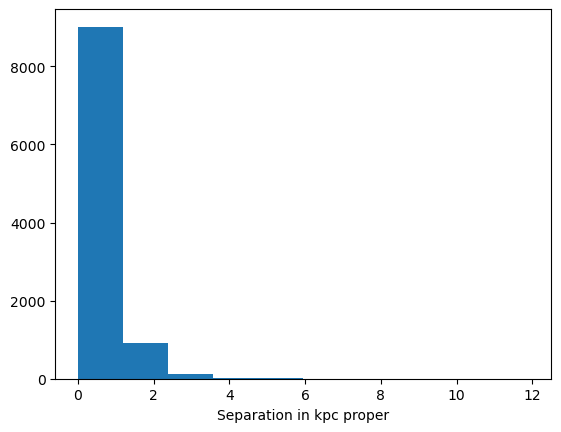

In [41]:
plt.hist(sep_phys_tde.value)
plt.xlabel("Separation in kpc proper")

Text(0.5, 0, 'Separation in arcsec')

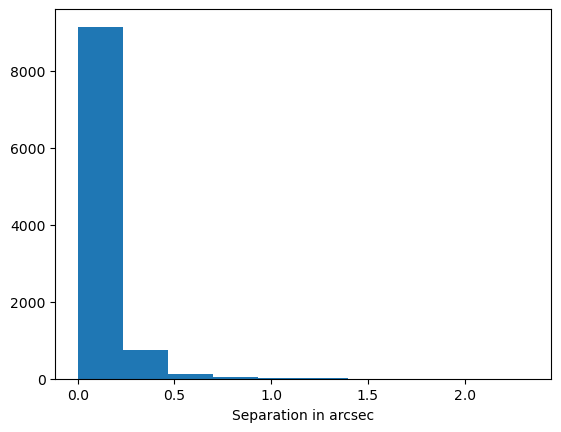

In [42]:
plt.hist(sep_tde.to(u.arcsec).value)
plt.xlabel("Separation in arcsec")

In [48]:
# compare with a more typical transient from SCOTCH
f    = h5py.File("/global/cscratch1/sd/mlokken/sn_hostenv/scotch_submitted/scotch_zlim.hdf5", "a")
slsn = f['TransientTable']['SLSN-I']['SLSN-I']
sep_slsn  = list(slsn['sep'][0:1000])
redshift_slsn    = list(slsn['z'][0:1000])

Text(0.5, 0, 'Separation in kpc proper')

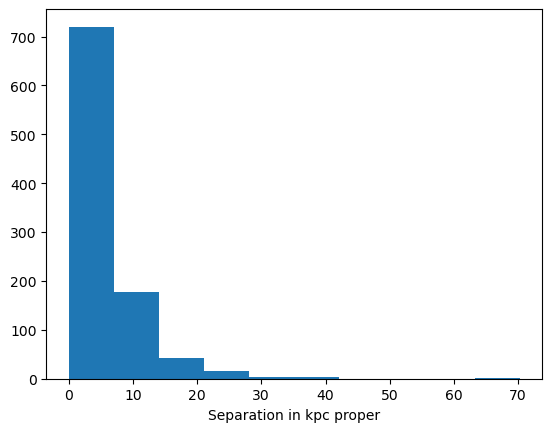

In [49]:
sep_phys_slsn = cosmo.kpc_proper_per_arcmin(redshift_slsn).to(u.kpc/u.arcsec)*sep_slsn*u.arcsec
plt.hist(sep_phys_slsn.value)
plt.xlabel("Separation in kpc proper")

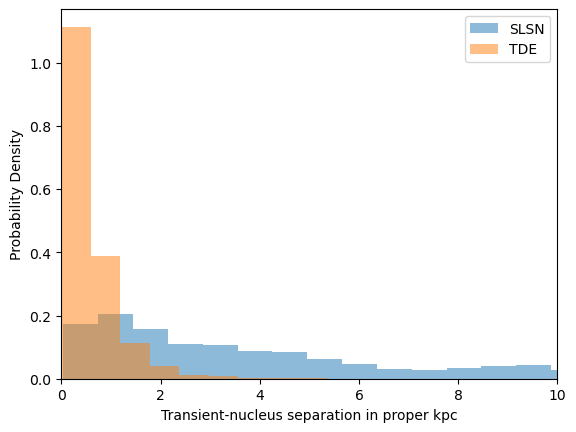

In [50]:
plt.hist(sep_phys_slsn.value, label='SLSN', alpha=.5, bins=100, density=True)
plt.hist(sep_phys_tde.value, label='TDE', alpha=.5, bins=20, density=True)
plt.xlabel("Transient-nucleus separation in proper kpc")
plt.ylabel("Probability Density")
plt.xlim([0,10])
plt.legend()

# Repeat for KN

In [9]:
transDir = "/global/cscratch1/sd/kessler/SNANA_LSST_SIM/MLAG_SCOTCH10k_KN_K17/"

KN_heads = []
for selection in ('0003', '0012', '0024', '0032'): # some random head files
    KN_head_fn = transDir + "MLAG_GP_SCOTCH10k_KN_MNINTFLUX_NONIaMODEL0-{:s}_HEAD.FITS.gz".format(selection)
    KN_head = table.Table.read(KN_head_fn, format='fits').to_pandas()
    KN_heads.append(KN_head)
KN = pd.concat(KN_heads)

In [10]:
KN['HOSTGAL_ELLIPTICITY'].iloc[np.where(KN['HOSTGAL_DEC']==-999)]

16    -9999.0
17    -9999.0
23    -9999.0
50    -9999.0
54    -9999.0
        ...  
215   -9999.0
221   -9999.0
222   -9999.0
234   -9999.0
249   -9999.0
Name: HOSTGAL_ELLIPTICITY, Length: 80, dtype: float32

Text(0.5, 0, 'arcsec')

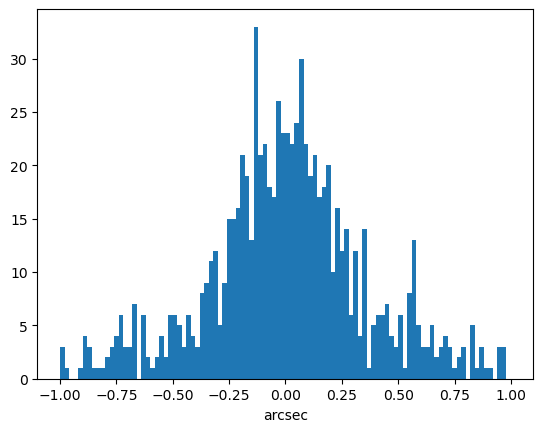

In [11]:
plt.hist(KN['HOSTGAL_DEC']*3600, range=[-1,1], bins=100)
plt.xlabel("arcsec")

Text(0.5, 0, 'RA [arcsec]')

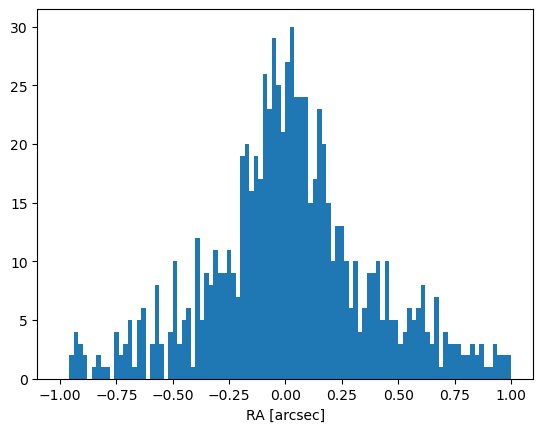

In [12]:
plt.hist(KN['HOSTGAL_RA']*3600, range=[-1,1], bins=100)
plt.xlabel("RA [arcsec]")

In [13]:
KN = KN.iloc[np.where(KN['HOSTGAL_RA']!=-999)]
# there is a problem with -999s

In [14]:
c2 = SkyCoord(KN['HOSTGAL_RA'].values*u.deg, KN['HOSTGAL_DEC'].values*u.deg, frame='icrs')
c1 = SkyCoord(0.0*u.deg, 0.0*u.deg, frame='icrs')
sep_kn = c1.separation(c2)
redshift_kn = np.asarray(KN['HOSTGAL_SPECZ'])
sep_phys_kn = cosmo.kpc_proper_per_arcmin(redshift_kn)*sep_kn.to(u.arcmin)
kn_hostgal_rad = KN['HOSTGAL_SQRADIUS']

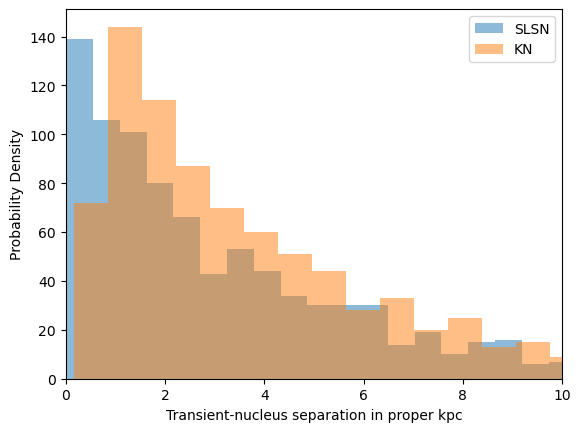

In [15]:
plt.hist(sep_phys_slsn.value, label='SLSN', alpha=.5, bins=150)
plt.hist(sep_phys_kn.value, label='KN', alpha=.5, bins=100)
plt.xlabel("Transient-nucleus separation in proper kpc")
plt.ylabel("Probability Density")
plt.xlim([0,10])
plt.legend()

# Test the new AGN separations from using MXINTFLUX=0.1 in the full runs, compare to original SCOTCH

In [16]:
scotch = h5py.File("/global/cscratch1/sd/mlokken/sn_hostenv/scotch_submitted/scotch_z3.hdf5", "r")

In [17]:
scotch_trans = scotch['TransientTable']

In [18]:
sep_AGN_scotch = scotch_trans['AGN']['AGN01']['sep'][:]
scotch.close()

In [32]:
# new AGN
transDir = "/global/cscratch1/sd/kessler/SNANA_LSST_SIM/MLAG_SCOTCH_ZLIM_AGN20/"
AGN_heads = []
for selection in ('0003', '0012', '0024', '0032'): # some random head files
    AGN_head_fn = transDir + "MLAG_SCOTCH_ZLIM_NONIaMODEL0-{:s}_HEAD.FITS.gz".format(selection)
    AGN_head = table.Table.read(AGN_head_fn, format='fits').to_pandas()
    AGN_heads.append(AGN_head)
AGN = pd.concat(AGN_heads)
AGN = AGN[AGN['HOSTGAL_RA']!=-999]

In [33]:
c2 = SkyCoord(AGN['HOSTGAL_RA'].values*u.deg, AGN['HOSTGAL_DEC'].values*u.deg, frame='icrs')
c1 = SkyCoord(0.0*u.deg, 0.0*u.deg, frame='icrs')
sep_agn = c1.separation(c2)
redshift_agn = np.asarray(AGN['HOSTGAL_SPECZ'])
sep_phys_agn = cosmo.kpc_proper_per_arcmin(redshift_agn)*sep_agn.to(u.arcmin)


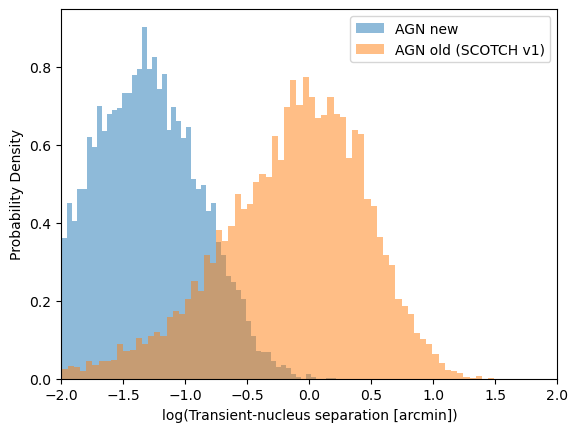

In [34]:
plt.hist(np.log10(sep_agn.to('arcsec').value), label='AGN new', alpha=.5, bins=100, density=True)
plt.hist(np.log10(sep_AGN_scotch), label='AGN old (SCOTCH v1)', alpha=.5, bins=100, density=True)
plt.xlabel("log(Transient-nucleus separation [arcmin])")
plt.ylabel("Probability Density")
plt.xlim([-2,2])
plt.legend()